## Source and Sink example


In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

print('x =',x)
print('y =',y)

X,Y = np.meshgrid(x,y)

x = [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y = [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26

In [28]:
width = 10.0
height = ((y_end - y_start)/(x_end - x_start)) * width
plt.figure(figsize=(width,height))
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.scatter(X,Y, s=2, c= 'g',marker = 'd')

TypeError: 'str' object is not callable

In [30]:
strength_source =5.0
x_source, y_source = -1.0,0.0

u_source = (strength_source/(2*np.pi)*
           (X-x_source)/((X-x_source)**2 + (Y-y_source)**2))
v_source = (strength_source/(2*np.pi)*
           (Y-y_source)/((X-x_source)**2 + (Y-y_source)**2))

In [31]:
u_source

array([[-0.39788736, -0.39644899, -0.39164905, ...,  0.24951761,
         0.24402597,  0.23873241],
       [-0.41445881, -0.41442684, -0.4109798 , ...,  0.25174276,
         0.2460938 ,  0.24065687],
       [-0.4316889 , -0.43325512, -0.43138462, ...,  0.25391275,
         0.24810863,  0.24253048],
       ..., 
       [-0.4316889 , -0.43325512, -0.43138462, ...,  0.25391275,
         0.24810863,  0.24253048],
       [-0.41445881, -0.41442684, -0.4109798 , ...,  0.25174276,
         0.2460938 ,  0.24065687],
       [-0.39788736, -0.39644899, -0.39164905, ...,  0.24951761,
         0.24402597,  0.23873241]])

In [29]:
plt.figure(figsize=(width,height))
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
#plt.streamplot(X,Y,u_source,v_source,
              # density=2,linewidth=1,arrowsize=2,arrowstyle='->')
plt.contour(u_source,v_source)
plt.scatter(x_source,y_source, c='r',s=80, marker='8')

TypeError: 'str' object is not callable

In [20]:
strength_sink =-5.0
x_sink, y_sink = 1.0,0

u_sink = (strength_sink/(2*np.pi)*
         (X-x_sink)/((X-x_sink)**2+(Y-y_sink)**2))
v_sink = (strength_sink/(2*np.pi)*
         (Y-y_sink)/((X-x_sink)**2+(Y-y_sink)**2))

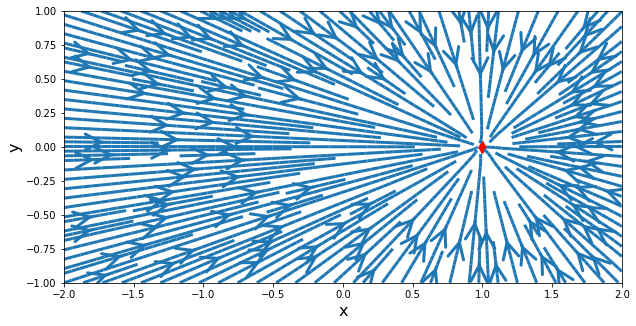

In [22]:
plt.figure(figsize=(width,height))
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,Y,u_sink,v_sink,
              density=2,linewidth=3,arrowsize=4,arrowstyle='->')

plt.scatter(x_sink,y_sink,c='r',s=80,marker='d')

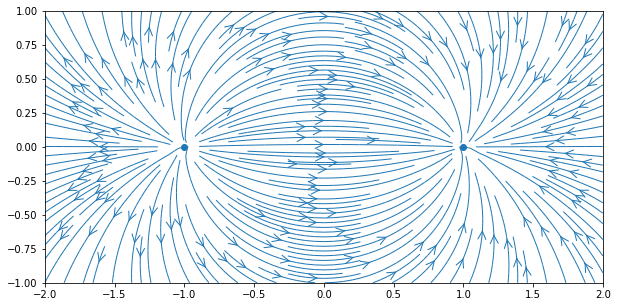

In [26]:
u_pair = u_source + u_sink
v_pair = v_source + v_sink

plt.figure(figsize=(width,height))
plt.xlabel='x'
plt.ylabel ='y'
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)

plt.streamplot(X,Y,u_pair,v_pair,
              density=2, linewidth=1,arrowsize=2,arrowstyle='->')
plt.scatter([x_source,x_sink],[y_source, y_sink])